<a href="https://colab.research.google.com/github/zlzonhenu/RNN-tutorial/blob/master/Timeseries_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Random seed to make results deterministic and reproducible
torch.manual_seed(0)

In [0]:
# make dataset to train
# scaling function for input data
def minmax_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    #noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [0]:
# make dataset to input
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        _x = time_series[i:i + seq_length, :]
        _y = time_series[i + seq_length, [-1]]  # Next close price
        print(_x, "->", _y)
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)

In [0]:
# hyper parameters
seq_length = 7
data_dim = 5 #open, high, low, volume, close
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

In [6]:
# load data
xy = np.loadtxt("/content/data-02-stck_daily.csv", delimiter=",")
xy = xy[::-1]  # reverse order(시간순)

# split train-test set
train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]

# scaling data
train_set = minmax_scaler(train_set)
test_set = minmax_scaler(test_set)

# make train-test dataset to input
trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

# convert to tensor
trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)

testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 [0.14300667 0.13856872 0.13617972 0.22934481 0.12698631]] -> [0.14877846]
[[0.13075879 0.14979736 0.13950917 0.35107108 0.1339569 ]
 [0.15042457 0.16374824 0.15035617 0.23008873 0.14071632]
 [0.14549092 0.14452321 0.11061926 0.34481491 0.154517  ]
 [0.16681257 0.20764196 0.18773052 0.4378686  0.22527992]
 [0.18685758 0.18212236 0.1560484  0.60962624 0.15331987]
 [0.14300667 0.13856872 0.13617972 0.22934481 0.12698631]
 [0.1172689  0.14037216 0.1430174  0.21129336 0.14877846]] -> [0.12107173]
[[0.15042457 0.16374824 0.15035617 0.23008873 0.14071632]
 [0.14549092 0.14452321 0.11061926 0.34481491 0.154517  ]
 [0.16681257 0.20764196 0.18773052 0.4378686  0.22527992]
 [0.18685758 0.18212236 0.1560484  0.60962624 0.15331987]
 [0.14300667 0.13856872 0.13617972 0.22934481 0.12698631]
 [0.1172689  0.14037216 0.1430174  0.21129336 0.14877846]
 [0.13503702 0.12893923 0.13850679 0.18323922 0.12107173]] -> [0.11480508]
[[0.14549092 0.14452321 0.11061926 0.344814

In [0]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, layers):
        super(Net, self).__init__()
        self.rnn = torch.nn.LSTM(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, output_dim, bias=True)

    def forward(self, x):
        #torch tensor형태의 입력(batchsize,7,5)을 넣는다.
        x, _status = self.rnn(x)
        #print(x.size())
        x = self.fc(x[:, -1])
        #print(x.size())
        return x


net = Net(data_dim, hidden_dim, output_dim, 1)

In [10]:
a = torch.FloatTensor(3,7,5)
print(net(a))

torch.Size([3, 7, 10])
torch.Size([3, 1])
tensor([[    nan],
        [ 0.1387],
        [-0.1435]], grad_fn=<AddmmBackward>)


In [0]:
# loss & optimizer setting
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [13]:
# start training
for i in range(iterations):

    optimizer.zero_grad()
    outputs = net(trainX_tensor)
    loss = criterion(outputs, trainY_tensor)
    loss.backward()
    optimizer.step()
    print(i, loss.item())

0 0.45783352851867676
1 0.35505688190460205
2 0.27425792813301086
3 0.20713824033737183
4 0.15103952586650848
5 0.10602670162916183
6 0.07298789918422699
7 0.052783139050006866
8 0.04545831307768822
9 0.04916633293032646
10 0.059122055768966675
11 0.06890104711055756
12 0.07409380376338959
13 0.07366897910833359
14 0.06878558546304703
15 0.061368297785520554
16 0.053255535662174225
17 0.04582240432500839
18 0.039879754185676575
19 0.03572069853544235
20 0.03323994576931
21 0.03207951784133911
22 0.03176781162619591
23 0.03183060884475708
24 0.03186503425240517
25 0.03157820552587509
26 0.03079855442047119
27 0.029469048604369164
28 0.027629923075437546
29 0.02539564110338688
30 0.022928889840841293
31 0.020412877202033997
32 0.01802346110343933
33 0.015902847051620483
34 0.014138154685497284
35 0.012748582288622856
36 0.011685259640216827
37 0.010845809243619442
38 0.010102043859660625
39 0.009334609843790531
40 0.008464979007840157
41 0.007475098129361868
42 0.006408729124814272
43 0.

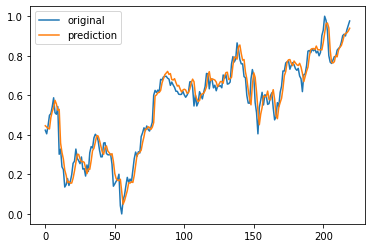

In [14]:
plt.plot(testY)
plt.plot(net(testX_tensor).data.numpy())
plt.legend(['original', 'prediction'])
plt.show()